In [184]:
##################################################
#### Divya TV June 2019
#################################################

###Import required libraries####################################
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
########################################################################
#### Load the CSV files and Initialize dataframes.#####################
## Provide path to the files.
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

## Load the CSV files.
# Read the City and Ride Data from CSV file
#city_data=pd.DataFrame()
city_data = pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

##Initialize th dataframes 
city_datadf=pd.DataFrame(city_data)
ride_datadf=pd.DataFrame(ride_data)

########################################################################
#### Merge datframes ###################################################
# Combine the data into a single dataset- use pd.merge on city
merged_data=pd.merge(ride_datadf, city_datadf, how='left', on='city')
#pd.merge(ride_data_df,city_data_df,how='left', on=['city'])


# Display the data table for preview
merged_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

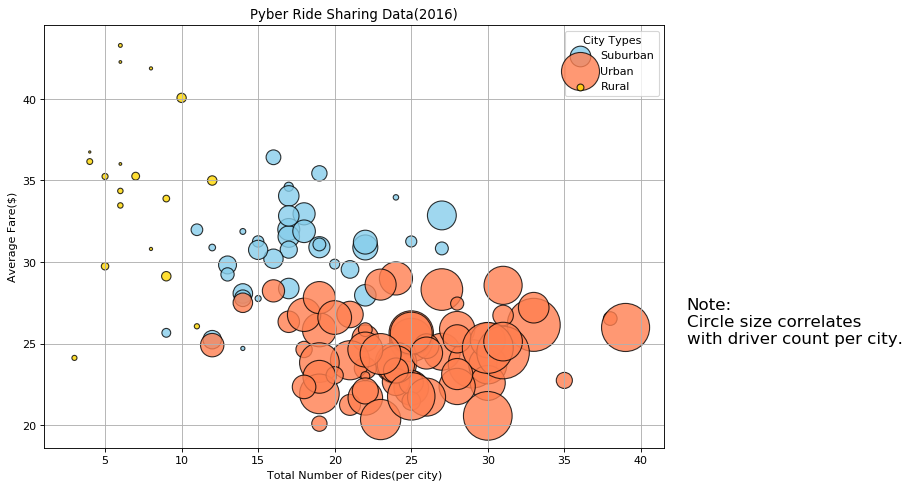

In [185]:
# Obtain the x and y coordinates for each of the three city types
# purchase_data = purchase_data.drop_duplicates(subset='SN', keep='first')
##drop duplicate rides
merged_data=merged_data.drop_duplicates(subset='ride_id', keep='first')

# fare_percity=merged_data.groupby(['city', 'type'])['fare'].mean()
# #print(fare_percity)

# rides_percity=merged_data.groupby(['city', 'type'])['ride_id'].count()
# # print(pd.DataFrame(rides_percity))
# rural_ridesdf=pd.DataFrame(rides_percity)

# driver_percity=merged_data.groupby('city')['driver_count'].sum()
# 
################################################################################################################
## Calcualte urban data
################################################################################################################
urban_data= merged_data.loc[ (merged_data['type'] == 'Urban'), : ]

fare_percity_urban=urban_data.groupby(['city', 'type'])['fare'].mean()
rides_percity_urban=urban_data.groupby(['city', 'type'])['ride_id'].count()
driver_percity_urban=urban_data.groupby('city')['driver_count'].sum()
###################################################################################################################
## Calculate suburban data
################################################################################################################
suburban_data= merged_data.loc[ (merged_data['type'] == 'Suburban'), : ]

fare_percity_suburban=suburban_data.groupby(['city', 'type'])['fare'].mean()
rides_percity_suburban=suburban_data.groupby(['city', 'type'])['ride_id'].count()
driver_percity_suburban=suburban_data.groupby('city')['driver_count'].sum()
###################################################################################################################
## Calculate rural data
################################################################################################################
rural_data= merged_data.loc[ (merged_data['type'] == 'Rural'), : ]

fare_percity_rural=rural_data.groupby(['city', 'type'])['fare'].mean()
rides_percity_rural=rural_data.groupby(['city', 'type'])['ride_id'].count()
driver_percity_rural=rural_data.groupby('city')['driver_count'].sum()
##########################################PLOT#########################################################################
plt.figure(figsize=(10, 7), dpi=80)

plt.scatter(rides_percity_suburban, fare_percity_suburban, s=driver_percity_suburban,  marker="o", 
                       facecolors="skyblue", edgecolors="black",label = "Suburban", alpha=0.80, linewidths=1)
plt.scatter(rides_percity_urban, fare_percity_urban, s=driver_percity_urban,  marker="o", 
                        facecolors="coral", edgecolors="black",label= "Urban", alpha=0.80, linewidths=1)
plt.scatter(rides_percity_rural, fare_percity_rural, s=driver_percity_rural,  marker="o", 
                        facecolors="gold", edgecolors="black", label="Rural", alpha=0.80, linewidths=1)

##########################################################################################################################
### labels and beautification
##################################################################
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(per city)")
plt.ylabel("Average Fare($)")
plt.grid(True)
# Create a legend
plt.legend(loc='upper right', fancybox=True, title="City Types")

# Incorporate a text label regarding circle size
plt.text(43,25,'Note:\nCircle size correlates \nwith driver count per city.',horizontalalignment='left',fontsize=15)
# Save Figure
#plt.show()

#savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)
plt.savefig("Divya_Scatter_Ride_Fare.jpg", transparent=False)

####### Ignore the code below **** ###########################################################################
# pal=dict({'Urban': 'gold', 'Rural':'skyblue','suburban':'coral'})

# g = sns.FacetGrid(rides_percity, fare_percity, palette=pal, height=5)
# g.map(plt.scatter, "rides_percity", "fare_percity", s=driver_percity, marker="o", alpha=.7, linewidth=.5, edgecolor="black")

# colors=['coral', 'skyblue','gold']
# #N=3
# #colors = np.random.rand(N)
# plt.grid(True)

# plt.scatter( rides_percity, fare_percity,s=driver_percity, c=color, marker="o" ,edgecolors="black",  alpha=0.75)

# #plt.savefig("../Images/sin_cos_with_markers.png")
# plt.show()

# #seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None,
# hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, 
# y_bins=None, units=None, estimator=None, 
# ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)¶
#colors=['coral', 'skyblue','gold']
#regiment_preScore = df['preTestScore'].groupby(df['regiment'])

#print(rural_fare_percity)

#for color in colors:
#plt.scatter(rides_percity,fare_percity, s=driver_percity, marker="o", c="skyblue", edgecolors="black",  alpha=0.75)
#sns.scatterplot(x=rides_percity, y=fare_percity, data='merged_data', hue='type', palette=colors)
# Build the scatter plots for each city types
## matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None,
#linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)[source]

# plt.scatter(fare_percity, rides_percity,s=driver_percity, marker="o", c=colors, edgecolors="black",  alpha=0.75)
# plt.show()



In [53]:
# Show plot
#plt.show()

## Total Fares by City Type

In [59]:
# urban_datadf=pd.DataFrame(urban_data)
# urban_datadf.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


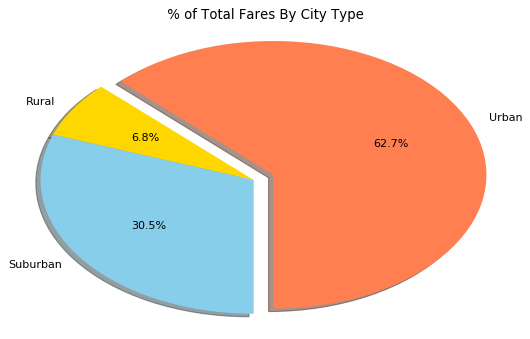

In [186]:
# Calculate Type Percents
merged_data.head()
fare_by_type=merged_data.groupby('type')['fare'].sum()
fare_by_typedf=pd.DataFrame(fare_by_type)
totalfare=merged_data['fare'].sum()
#print(totalfare)

#######################################
fare_by_urban=urban_data.fare.sum()
urban_fare_percentage=round((fare_by_urban/totalfare)*100,1)

fare_by_rural=rural_data.fare.sum()
rural_fare_percentage=round((fare_by_rural/totalfare)*100,1)

fare_by_suburban=suburban_data.fare.sum()
suburban_fare_percentage=round((fare_by_suburban/totalfare)*100,1)

# # Build Pie Chart

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.figure(figsize=(8, 5), dpi=80)
labels = 'Urban', 'Rural', 'Suburban'
data = [urban_fare_percentage, rural_fare_percentage, suburban_fare_percentage]
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'urban')
colors = ['coral', 'gold', 'skyblue']
plt.pie(
    # using data total)arrests
    data,
    # with the labels being officer names
    labels=labels,
    # with no shadows=false
    shadow=True,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.1, 0, 0),
    # with the start angle at 90%
    startangle=270,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
#plt.pie(data, explode=explode, labels=labels, colors=colors, shadow=True, startangle=270)
plt.title(" % of Total Fares By City Type")
plt.axis('auto')
#plt.tight_layout()
#plt.show()

# Save Figure
plt.savefig("Divya_pie_totalpercentage_fare.jpg", transparent=False )

#################Igonore code ****#################
#type(urban_fare_percentage)
#print("vive=",total_fare_urban)

# fare_by_typedf.head()

# transposedtable=fare_by_typedf.T
# #print(transposedtable)

# #print(transposedtable['Rural'])
# #newdf=pd.DataFrame(transposedtable)

# Ruralpert=round((transposedtable['Rural']/totalfare)*100, 1)
# Urbanpert=round((transposedtable['Urban']/totalfare)*100, 1)
# Suburbanpert=round((transposedtable['Suburban']/totalfare)*100, 1)

# #print(transposedtable['Rural'])
# print("rural=",Ruralpert)
# # print("urban=",Urbanpert)
# # print("suburban=",Suburbanpert)


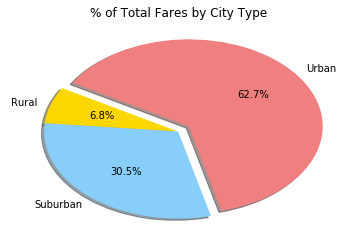

In [4]:
# Show Figure
#plt.show()

## Total Rides by City Type

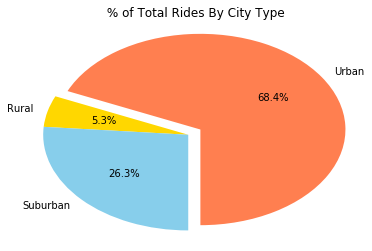

In [187]:
# Calculate Ride Percents
ride_by_urban=urban_data.ride_id.count()
ride_by_rural=rural_data.ride_id.count()
ride_by_suburban=suburban_data.ride_id.count()

total_rides=ride_by_urban+ride_by_rural+ride_by_suburban

ride_by_urban_percentage=round((ride_by_urban/total_rides)*100, 2)
ride_by_rural_percentage=round((ride_by_rural/total_rides)*100, 2)
ride_by_suburban_percentage=round((ride_by_suburban/total_rides)*100, 2)
# Build Pie Chart

labels = 'Urban', 'Rural', 'Suburban'
data = [ride_by_urban_percentage, ride_by_rural_percentage, ride_by_suburban_percentage]
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'urban')
colors = ['coral', 'gold', 'skyblue']
plt.pie(
    # using data total)arrests
    data,
    # with the labels being officer names
    labels=labels,
    # with no shadows=false
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.1, 0, 0),
    # with the start angle at 90%
    startangle=270,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
#plt.pie(data, explode=explode, labels=labels, colors=colors, shadow=True, startangle=270)
plt.title(" % of Total Rides By City Type")
plt.axis('auto')
#plt.tight_layout()
#plt.show()

# Save Figure
plt.savefig("Divya_pie_totalpercentage_rides.jpg", dpi=600, transparent=False )

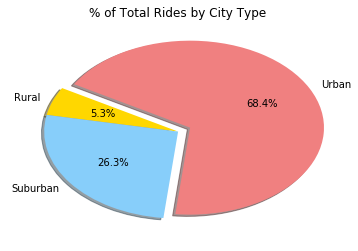

In [5]:
# Show Figure
#plt.show()

## Total Drivers by City Type

In [159]:

####

2973


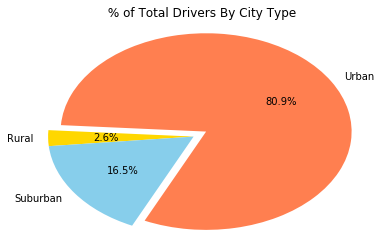

In [188]:
##### get the data from city_data sheet ############################
urban_data= city_data.loc[ (city_data['type'] == 'Urban'), : ]

#print(urban_data)
urban_driver_count=urban_data.driver_count.sum()
#print(urban_driver_count)
###################################################################
rural_data= city_data.loc[ (city_data['type'] == 'Rural'), : ]
rural_driver_count=rural_data.driver_count.sum()

###################################################################
suburban_data= city_data.loc[(city_data['type'] == 'Suburban'), :]
                               
###################################################################

total_driver_count=urban_driver_count+rural_driver_count+suburban_driver_count
print(total_driver_count)
########################################################################################
driver_by_urban_percentage=round((urban_driver_count/total_driver_count)*100, 1)
driver_by_rural_percentage=round((rural_driver_count/total_driver_count)*100, 1)
driver_by_subrban_percentage=round((suburban_driver_count/total_driver_count)*100, 1)

#print(driver_by_urban_percentage,driver_by_rural_percentage, driver_by_subrban_percentage )
################################################################### PLOT ###################
labels = 'Urban', 'Rural', 'Suburban'
data = [driver_by_urban_percentage, driver_by_rural_percentage, driver_by_subrban_percentage]
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'urban')
colors = ['coral', 'gold', 'skyblue']
plt.pie(
    # using data total)arrests
    data,
    # with the labels being officer names
    labels=labels,
    # with no shadows=false
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.1, 0, 0),
    # with the start angle at 90%
    startangle=245,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
#plt.pie(data, explode=explode, labels=labels, colors=colors, shadow=True, startangle=270)
plt.title(" % of Total Drivers By City Type")
plt.axis('auto')
#plt.tight_layout()
#plt.show() - keep this commented for picture to save in file
                               
#### Save the file
plt.savefig("Divya_pie_totalpercentage_drivers.jpg", dpi=600 , transparent=False)                              


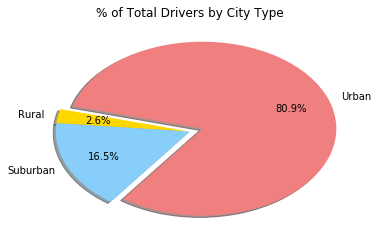

In [6]:
# Show Figure
plt.show()